# Project description

In [119]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
# import datasets needed for the project

df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df_attrition = pd.read_csv('attrition.csv')
df_sample_output = pd.read_csv('sample_output.csv')

In [3]:
# preview of df1 dataset - we see that df1 records data about general info of employees on their jobs

df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [4]:
# preview of df2 dataset - here we can see specific records of employees in relation with thier jobs 

df2.head(15)

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
5,1467,Y,No,15.0,3.0,4.0,80.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,Yes,32904.0
6,727,Y,No,15.0,3.0,4.0,80.0,0.0,10.0,6.0,3.0,7.0,7.0,7.0,7.0,No,133908.0
7,351,Y,Yes,11.0,3.0,3.0,80.0,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0,No,31116.0
8,555,Y,No,16.0,3.0,4.0,80.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,Yes,28212.0
9,253,Y,No,14.0,3.0,2.0,80.0,1.0,21.0,2.0,3.0,20.0,8.0,9.0,9.0,No,228396.0


In [5]:
# preview of attrition dataset - it looks like this dataset rocords only if an employee will stay or leave from his current job

df_attrition.head(15)

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
5,1467,Yes
6,727,No
7,351,No
8,555,Yes
9,253,No


In [6]:
# preview of sample_output dataset - this is a sample dataset

df_sample_output.head()

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [7]:
# view summary of df1 dataset - we see that we have 20 different variables(int, float and object),
# with 4449 observations (none of it being null) in each of it.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [8]:
# view summary of df2 - here we can see 17 variables (int, object, float), 
# with 4449 observations in each of it, except Attrition variable - hwo has only 4302 observations.

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [9]:
# view attrition summary  - with 2 variables, in witch we have 4449 observation (Employynumber) and 4302 obs.(Attrition)
# it looks like 

df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


In [10]:
# view summary 

df_sample_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EmployeeNumber  147 non-null    int64
 1   Attrition       147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [11]:
# preview of sample_output dataset

df_sample_output.sample(5)

,EmployeeNumber,Attrition
14,100014,1
117,100117,1
37,100037,1
57,100057,1
42,100042,1


In [12]:
# looking for duplicates in df1

df1.duplicated().value_counts()

False    4449
dtype: int64

In [13]:
# looking for duplicates in df2

df2.duplicated().value_counts()

False    4449
dtype: int64

In [14]:
# looking for correlation between df1's numerical variables.
# there is no correlation between emplyeecount variable and the others.

df1.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
EmployeeNumber,1.000000,-0.019373,0.002550,-0.019409,0.018001,NaN,-0.002519,-0.014046,-0.015832,0.007324,0.009382,0.016650,0.007647,0.009349
Age,-0.019373,1.000000,0.015925,-0.055524,0.035153,NaN,-0.026253,-0.003492,0.014527,0.051717,-0.007992,0.049328,-0.021209,0.028200
DailyRate,0.002550,0.015925,1.000000,-0.038138,-0.006985,NaN,0.023780,0.040703,0.043028,0.006980,0.029500,0.015991,-0.035353,0.048689
DistanceFromHome,-0.019409,-0.055524,-0.038138,1.000000,-0.010525,NaN,-0.013301,-0.037503,0.003342,-0.039946,0.006468,-0.029227,0.000353,-0.020385
Education,0.018001,0.035153,-0.006985,-0.010525,1.000000,NaN,-0.034617,0.017561,0.059247,0.104074,-0.016301,0.097421,-0.036449,0.131590
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.002519,-0.026253,0.023780,-0.013301,-0.034617,NaN,1.000000,-0.057194,-0.011073,-0.002458,0.003041,-0.012980,0.039651,0.016328
HourlyRate,-0.014046,-0.003492,0.040703,-0.037503,0.017561,NaN,-0.057194,1.000000,0.038947,-0.032072,-0.069440,-0.018453,-0.014855,0.005093
JobInvolvement,-0.015832,0.014527,0.043028,0.003342,0.059247,NaN,-0.011073,0.038947,1.000000,-0.012870,-0.029586,-0.013128,0.004474,0.011558
JobLevel,0.007324,0.051717,0.006980,-0.039946,0.104074,NaN,-0.002458,-0.032072,-0.012870,1.000000,-0.006538,0.950543,0.041928,0.147827


In [15]:
# checking for frequency distribution on employeecount variable. It looks like we no longer need this variable.

df1.EmployeeCount.value_counts()

1.0    4449
Name: EmployeeCount, dtype: int64

In [16]:
# extracting categorical variables from dataset df1

cat_val = [var for var in df1.columns if df1[var].dtype == 'O']
len(cat_val), cat_val

(6,
 ['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus'])

In [17]:
# preview of categorical variables

df1[cat_val].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married
1,Travel_Rarely,Research & Development,Medical,Female,Manufacturing Director,Married
2,Travel_Rarely,Research & Development,Other,Female,Research Scientist,Married
3,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single
4,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Divorced


In [18]:
# looking how the categorical variables are distributed

for var in cat_val:
    print(df1[var].value_counts())

Travel_Rarely        3147
Travel_Frequently     843
Non-Travel            459
Name: BusinessTravel, dtype: int64
Research & Development    2916
Sales                     1345
Human Resources            188
Name: Department, dtype: int64
Life Sciences       1823
Medical             1400
Marketing            486
Technical Degree     404
Other                254
Human Resources       82
Name: EducationField, dtype: int64
Male      2681
Female    1768
Name: Gender, dtype: int64
Sales Executive              983
Research Scientist           913
Laboratory Technician        781
Manufacturing Director       430
Healthcare Representative    397
Manager                      299
Sales Representative         252
Research Director            240
Human Resources              154
Name: JobRole, dtype: int64
Married     2074
Single      1430
Divorced     945
Name: MaritalStatus, dtype: int64


In [19]:
# extracting numerical variables in dataset df1

num_val = [var for var in df1.columns if df1[var].dtype != 'O']
len(num_val), num_val

(14,
 ['EmployeeNumber',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked'])

In [20]:
# priview of numerical variables

df1[num_val].head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,852.0,1.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0
1,1638,38.0,397.0,2.0,2.0,1.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0
2,164,26.0,841.0,6.0,3.0,1.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0
3,395,28.0,1117.0,8.0,2.0,1.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0
4,53,35.0,464.0,4.0,2.0,1.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0


In [21]:
# save in a new dataframe our descriptive statistics from df1 

df_describe = df1[num_val].describe()
df_describe

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [22]:
# we see in df1 dataset, that two variables (Distance From Home and Age) have some outliers

# looking for outliers in Distance From Home variable
bins = [0, 3, 5, 10, 15, 20, 25, 50, 100, 500, 1000, 10000, 1000000]
df1['Distancebins'] = pd.cut(df1.DistanceFromHome, bins = bins)
df1['Distancebins'].value_counts()

(0, 3]              1431
(5, 10]             1106
(15, 20]             364
(3, 5]               351
(20, 25]             348
(10, 15]             334
(10000, 1000000]     279
(25, 50]             236
(50, 100]              0
(100, 500]             0
(500, 1000]            0
(1000, 10000]          0
Name: Distancebins, dtype: int64

In [23]:
# list(df1[df1['DistanceFromHome']> 50].Age)

In [24]:
# check minimum age for the distance from home outliers

df1[df1['DistanceFromHome']> 50].Age.min()

20.0

In [25]:
# check max age for the distance from home outliers

df1[df1['DistanceFromHome']> 50].Age.max()

60.0

In [26]:
# get rid of outliers, based on a threshold on distance from home variable

df1 = df1[df1['DistanceFromHome'] <= 50]
df1.shape

(4170, 21)

In [27]:
# get rid of outliers, based on a threshold on age variable

df1 = df1[df1['Age'] <= 60]
df1.shape

(3872, 21)

In [28]:
# check again the descriptive statistics on df1, after cleaning the outliers

df1.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,3872.000000,3872.000000,3872.000000,3872.000000,3872.0000,3872.0,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000
mean,8164.501291,36.795713,802.556560,9.196023,2.9078,1.0,2.721591,66.258006,2.740702,2.064566,2.722882,6501.430010,14320.605114,2.696281
std,18454.064516,9.170525,405.837865,8.057181,1.0264,0.0,1.091982,20.138267,0.712233,1.099289,1.106993,4680.304458,7162.420985,2.504907
min,1.000000,18.000000,102.000000,1.000000,1.0000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1513.750000,30.000000,464.000000,2.000000,2.0000,1.0,2.000000,49.000000,2.000000,1.000000,2.000000,2931.250000,8033.750000,1.000000
50%,5762.500000,35.000000,804.000000,7.000000,3.0000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,14269.500000,2.000000
75%,6923.250000,43.000000,1169.000000,14.000000,4.0000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8392.000000,20497.000000,4.000000
max,100146.000000,60.000000,1499.000000,29.000000,5.0000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [315]:
# profile = ProfileReport(df1, title = 'Analizing data on df1')
# profile

In [29]:
# looking for correlation on df1

df1.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
EmployeeNumber,1.000000,0.016693,0.002017,0.015804,0.019749,NaN,-0.002775,-0.016879,-0.016946,0.006636,0.010306,0.016881,0.007055,0.009134
Age,0.016693,1.000000,0.012230,-0.015502,0.214623,NaN,0.011371,0.024139,0.028394,0.514662,-0.010235,0.501493,0.016389,0.318647
DailyRate,0.002017,0.012230,1.000000,0.003498,-0.014996,NaN,0.026405,0.056838,0.022671,0.006242,0.028285,0.014291,-0.040955,0.055925
DistanceFromHome,0.015804,-0.015502,0.003498,1.000000,0.015931,NaN,-0.012235,0.016838,0.014217,0.004900,-0.001207,-0.021445,0.023374,-0.031289
Education,0.019749,0.214623,-0.014996,0.015931,1.000000,NaN,-0.038582,0.020535,0.070474,0.108307,-0.026131,0.103571,-0.045866,0.140927
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.002775,0.011371,0.026405,-0.012235,-0.038582,NaN,1.000000,-0.052356,-0.011135,-0.001807,0.007109,-0.011680,0.049033,0.023478
HourlyRate,-0.016879,0.024139,0.056838,0.016838,0.020535,NaN,-0.052356,1.000000,0.032060,-0.029541,-0.090794,-0.009817,-0.019323,0.029203
JobInvolvement,-0.016946,0.028394,0.022671,0.014217,0.070474,NaN,-0.011135,0.032060,1.000000,-0.025134,-0.030218,-0.022735,-0.000031,0.004933
JobLevel,0.006636,0.514662,0.006242,0.004900,0.108307,NaN,-0.001807,-0.029541,-0.025134,1.000000,-0.002913,0.950055,0.036736,0.151599


<AxesSubplot:>

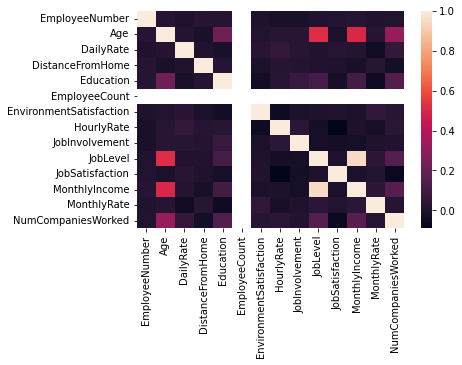

In [30]:
# view map correlation on df1

sns.heatmap(df1.corr())

In [31]:
# view all columns on df1 dataset

df1.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Distancebins'],
      dtype='object')

In [32]:
# from map correlation we see that it doesn't exist any correlations between employee count variable and all the others.
# so, we no longer need this variable in our df1.

df1 = df1.drop(['EmployeeCount'], axis = 1)

In [33]:
# looking for outliers in age variable.

df1[df1['Age']> 60].Age

Series([], Name: Age, dtype: float64)

In [34]:
#df_describe

In [35]:
# view summary of nuerical variables in df1

# df1[num_val].info()

In [165]:
# merging datasets by joining df2 to df1 based on EmployeeNumber variable

df_joined = df1.join(df2, 'EmployeeNumber', rsuffix = '_', how = 'right') 

# view summary of joined dataset.

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4449 entries, nan to nan
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            4449 non-null   int64   
 1   Age                       1323 non-null   float64 
 2   BusinessTravel            1323 non-null   object  
 3   DailyRate                 1323 non-null   float64 
 4   Department                1323 non-null   object  
 5   DistanceFromHome          1323 non-null   float64 
 6   Education                 1323 non-null   float64 
 7   EducationField            1323 non-null   object  
 8   EnvironmentSatisfaction   1323 non-null   float64 
 9   Gender                    1323 non-null   object  
 10  HourlyRate                1323 non-null   float64 
 11  JobInvolvement            1323 non-null   float64 
 12  JobLevel                  1323 non-null   float64 
 13  JobRole                   1323 non-null   obj

In [37]:
# view columns on joined dataset

df_joined.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Distancebins',
       'EmployeeNumber_', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearlyIncome'],
      dtype='object')

In [253]:
'''beacuse of the difference on the observations number between variables from our dataset, we chose to extract variables
with bigger number of obsertvations and save them in a new dataframe '''

df_var1 = df_joined[['OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearlyIncome']]
df_var1.shape

(4449, 15)

In [39]:
# looking for correlations in our new dataset

df_var1.corr()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
PercentSalaryHike,1.000000,0.769468,-0.034994,NaN,0.013089,-0.021621,-0.000825,0.009192,-0.020783,0.006451,-0.029875,0.075853,-0.032104
PerformanceRating,0.769468,1.000000,-0.019060,NaN,0.008638,-0.042170,-0.005184,0.006093,0.005058,0.031777,-0.036196,0.074430,-0.023671
RelationshipSatisfaction,-0.034994,-0.019060,1.000000,NaN,-0.049191,-0.001937,0.002823,0.022271,0.024811,-0.056412,0.026163,-0.025259,0.034326
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,0.013089,0.008638,-0.049191,NaN,1.000000,0.003949,0.016832,0.007943,0.043694,0.001728,-0.019817,-0.011646,0.001211
TotalWorkingYears,-0.021621,-0.042170,-0.001937,NaN,0.003949,1.000000,0.014754,0.006436,-0.048578,-0.053709,-0.054726,-0.050709,-0.024978
TrainingTimesLastYear,-0.000825,-0.005184,0.002823,NaN,0.016832,0.014754,1.000000,0.025567,0.011733,-0.030632,-0.009216,0.036043,-0.033840
WorkLifeBalance,0.009192,0.006093,0.022271,NaN,0.007943,0.006436,0.025567,1.000000,-0.030857,-0.010529,-0.024407,-0.005736,0.039486
YearsAtCompany,-0.020783,0.005058,0.024811,NaN,0.043694,-0.048578,0.011733,-0.030857,1.000000,-0.052767,-0.053446,-0.049456,0.037274
YearsInCurrentRole,0.006451,0.031777,-0.056412,NaN,0.001728,-0.053709,-0.030632,-0.010529,-0.052767,1.000000,-0.058958,-0.054636,0.002061


<AxesSubplot:>

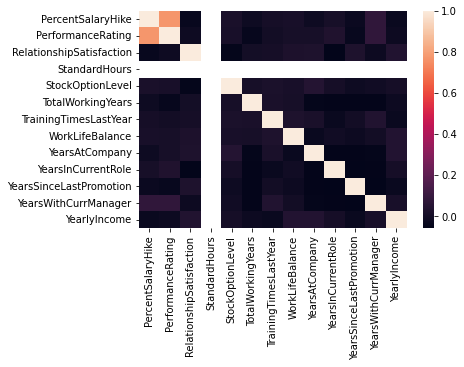

In [40]:
# view map correlation - we can see that standardhours variable is not correlated with any other variable - so we will drop it

sns.heatmap(df_var1.corr())

In [277]:
# encoding overtime categorical variable

df_var1['OverTime'] = df_var1['OverTime'].astype('category').cat.codes

In [278]:
# check frequency after encoding on overtime variable

df_var1.OverTime.value_counts()

0    3089
1    1213
Name: OverTime, dtype: int64

In [279]:
# from correlation map we can see that standardhours variable it is not correlated with any other variable. So we will drop it.

df_var1 = df_var1.drop(columns = 'StandardHours')

In [280]:
# encoding attrition variable - this is our target

df_var1['Attrition'] = df_var1['Attrition'].astype('category').cat.codes
df_var1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4302 entries, nan to nan
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  4302 non-null   int8   
 1   PercentSalaryHike         4302 non-null   float64
 2   PerformanceRating         4302 non-null   float64
 3   RelationshipSatisfaction  4302 non-null   float64
 4   StockOptionLevel          4302 non-null   float64
 5   TotalWorkingYears         4302 non-null   float64
 6   TrainingTimesLastYear     4302 non-null   float64
 7   WorkLifeBalance           4302 non-null   float64
 8   YearsAtCompany            4302 non-null   float64
 9   YearsInCurrentRole        4302 non-null   float64
 10  YearsSinceLastPromotion   4302 non-null   float64
 11  YearsWithCurrManager      4302 non-null   float64
 12  Attrition                 4302 non-null   int8   
 13  YearlyIncome              4302 non-null   float64
dtypes: fl

In [281]:
# check frequency on our target variable

df_var1['Attrition'].value_counts()

1    2222
0    2080
Name: Attrition, dtype: int64

In [282]:
# we can see that there are some null values in our target. So we will get rid of these null values

df_var1 = df_var1[df_var1['Attrition'] != -1]
df_var1.shape

(4302, 14)

In [283]:
# declare feature vector and target variable based on our new dataframe df_var1

X = df_var1.drop(columns = ['Attrition'])
y = df_var1.Attrition

In [284]:
y

NaN       0
1228.0    0
298.0     0
NaN       0
NaN       0
         ..
NaN       1
NaN       1
NaN       1
NaN       1
NaN       1
Name: Attrition, Length: 4302, dtype: int8

In [285]:
X

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
NaN,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1228.0,1,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
298.0,0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
NaN,0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
NaN,0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0
NaN,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0
NaN,0,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0
NaN,0,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0


In [286]:
# spliting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

In [294]:
# apply first model of machine learning classification - Random Forrest Classifier

model = RandomForestClassifier(n_estimators = 200, max_depth = 5, random_state = 5)

# fit the model on our train set
model.fit(X_train,y_train)

# define y_pred_v1 on the test set for predicting the results - based on df_var1
y_pred_rfc_v1 = model.predict(X_test)

# print the accuracy score and confusion matrix on the test model, using built in functions
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.5902401239349342
[[523 107]
 [422 239]]


In [295]:
# apply second model of machine learning classification - Ada Boost Classifier

model_1 = AdaBoostClassifier(random_state = 5)

# fit the model on our train set
model_1.fit(X_train,y_train)

# define y_pred on the test set for predicting the results - based on df_var1
y_pred_ada_v1 = model_1.predict(X_test)

# print the accuracy score and confusion matrix on the test model, using built in functions
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.5902401239349342
[[523 107]
 [422 239]]


In [296]:
# apply second model of machine learning classification - Ada Boost Classifier

model_2 = tree.DecisionTreeClassifier(max_depth = 5, random_state = 5)

# fit the model on our train set
model_2.fit(X_train,y_train)

# define y_pred on the test set for predicting the results
y_pred_dtree_v1 = model_2.predict(X_test)

# print the accuracy score and confusion matrix on the test model, using built in functions
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.5902401239349342
[[523 107]
 [422 239]]


In [299]:
print(classification_report(y_test, y_pred_rfc_v1))
print(precision_score(y_test, y_pred_rfc_v1))
print(recall_score(y_test, y_pred_rfc_v1))
print(f1_score(y_test, y_pred_rfc_v1))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       630
           1       0.65      0.56      0.60       661

    accuracy                           0.62      1291
   macro avg       0.62      0.62      0.62      1291
weighted avg       0.62      0.62      0.62      1291

0.6461267605633803
0.5552193645990923
0.5972335231895851


In [300]:
print(classification_report(y_test, y_pred_ada_v1))
print(precision_score(y_test, y_pred_ada_v1))
print(recall_score(y_test, y_pred_ada_v1))
print(f1_score(y_test, y_pred_ada_v1))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       630
           1       0.65      0.55      0.59       661

    accuracy                           0.62      1291
   macro avg       0.62      0.62      0.62      1291
weighted avg       0.62      0.62      0.61      1291

0.6482142857142857
0.5491679273827534
0.5945945945945945


In [301]:
print(classification_report(y_test, y_pred_dtree_v1))
print(precision_score(y_test, y_pred_dtree_v1))
print(recall_score(y_test, y_pred_dtree_v1))
print(f1_score(y_test, y_pred_dtree_v1))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66       630
           1       0.69      0.36      0.47       661

    accuracy                           0.59      1291
   macro avg       0.62      0.60      0.57      1291
weighted avg       0.62      0.59      0.57      1291

0.6907514450867052
0.3615733736762481
0.4746772591857001


In [308]:
def get_f1_v1(y_test, y_pred):
    scores = precision_recall_fscore_support(y_test, y_pred, pos_label = 1)
    return scores[2]


In [309]:
scores_ada_v1 = get_f1_v1(y_test, y_pred_ada_v1)

scores_rfc_v1 = get_f1_v1(y_test, y_pred_rfc_v1)

scores_dtree_v1 = get_f1_v1(y_test, y_pred_dtree_v1)

In [313]:
scores_ada_v1, scores_rfc_v1, scores_dtree_v1

(array([0.63629684, 0.59459459]),
 array([0.63414634, 0.59723352]),
 array([0.66412698, 0.47467726]))

because we got bad scores based on df_var1 dataset, we will try to get better scores based on joined datasets

In [162]:
# drop duplicated observation on EmployeeNumber variable after we joined datasets

df_joined = df_joined.drop_duplicates(['EmployeeNumber'])

In [52]:
# check the shape of our joined dataset

df_joined.shape

(4449, 37)

In [53]:
#df_joined = df_joined.drop(columns = ['EmployeeNumber_'])

# view summary of our joined dataset
# we can see a difference on observations between variables - these are missing values

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4449 entries, nan to nan
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            4449 non-null   int64   
 1   Age                       1323 non-null   float64 
 2   BusinessTravel            1323 non-null   object  
 3   DailyRate                 1323 non-null   float64 
 4   Department                1323 non-null   object  
 5   DistanceFromHome          1323 non-null   float64 
 6   Education                 1323 non-null   float64 
 7   EducationField            1323 non-null   object  
 8   EnvironmentSatisfaction   1323 non-null   float64 
 9   Gender                    1323 non-null   object  
 10  HourlyRate                1323 non-null   float64 
 11  JobInvolvement            1323 non-null   float64 
 12  JobLevel                  1323 non-null   float64 
 13  JobRole                   1323 non-null   obj

In [54]:
# check correlations between variables - Standarhourse is not correlated with any other variable - we will drop it

df_joined.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,-0.009759,-0.050211,0.026861,0.043102,0.006609,0.038289,-0.004298,-0.027881,-0.054753,...,NaN,-0.004818,0.114922,0.006921,-0.022907,0.136687,0.123187,0.135062,0.151933,-0.012142
Age,-0.009759,1.000000,0.012652,-0.013337,0.214639,0.000820,0.014146,0.020669,0.503286,0.009198,...,NaN,0.035762,0.012052,0.006656,-0.048970,-0.022143,0.004612,-0.029575,-0.034974,0.016172
DailyRate,-0.050211,0.012652,1.000000,-0.012191,-0.015862,0.013302,0.024155,0.042502,0.016489,0.038375,...,NaN,0.004513,0.004633,-0.024829,-0.001826,-0.058330,-0.003596,0.015423,0.041503,0.050580
DistanceFromHome,0.026861,-0.013337,-0.012191,1.000000,0.024746,-0.012696,0.017824,0.018445,0.005669,-0.006778,...,NaN,0.006670,-0.013385,0.009555,0.018451,0.012168,0.078806,0.017556,-0.004528,0.042870
Education,0.043102,0.214639,-0.015862,0.024746,1.000000,-0.017825,0.026018,0.044867,0.095475,-0.014386,...,NaN,0.032192,-0.003999,-0.028016,-0.005719,-0.013551,0.047016,-0.015326,-0.047354,-0.015422
EnvironmentSatisfaction,0.006609,0.000820,0.013302,-0.012696,-0.017825,1.000000,-0.060868,-0.006696,-0.002147,0.015440,...,NaN,-0.020642,0.026744,-0.023762,-0.033635,-0.038938,0.009694,0.026496,-0.036393,-0.012077
HourlyRate,0.038289,0.014146,0.024155,0.017824,0.026018,-0.060868,1.000000,0.046711,-0.039244,-0.074310,...,NaN,-0.008888,0.021392,0.011335,0.033713,0.039138,-0.008602,-0.006014,-0.028697,0.035180
JobInvolvement,-0.004298,0.020669,0.042502,0.018445,0.044867,-0.006696,0.046711,1.000000,-0.024524,-0.021479,...,NaN,0.038875,-0.003577,-0.001595,0.002530,-0.042761,0.020617,0.016777,-0.015190,-0.010355
JobLevel,-0.027881,0.503286,0.016489,0.005669,0.095475,-0.002147,-0.039244,-0.024524,1.000000,0.007858,...,NaN,0.023486,-0.032550,-0.044015,-0.032453,-0.009485,-0.017017,0.002165,-0.052529,0.048645
JobSatisfaction,-0.054753,0.009198,0.038375,-0.006778,-0.014386,0.015440,-0.074310,-0.021479,0.007858,1.000000,...,NaN,0.013263,0.031261,-0.039799,-0.005254,-0.040001,-0.035784,0.007389,0.006167,0.015573


In [55]:
# check for frequency on employeenumber variable

df_joined.EmployeeNumber.value_counts()

0       1
2964    1
2970    1
2969    1
2968    1
       ..
1489    1
1490    1
1491    1
1492    1
4448    1
Name: EmployeeNumber, Length: 4449, dtype: int64

In [56]:
# a quick preview of our joined dataset - as we expected, we have missing values on our dataset

df_joined.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1228.0,1,41.0,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
298.0,2,49.0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [102]:
#df_joined.EmployeeNumber.value_counts()

In [58]:
#check again summary on our joined dataset

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4449 entries, nan to nan
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            4449 non-null   int64   
 1   Age                       1323 non-null   float64 
 2   BusinessTravel            1323 non-null   object  
 3   DailyRate                 1323 non-null   float64 
 4   Department                1323 non-null   object  
 5   DistanceFromHome          1323 non-null   float64 
 6   Education                 1323 non-null   float64 
 7   EducationField            1323 non-null   object  
 8   EnvironmentSatisfaction   1323 non-null   float64 
 9   Gender                    1323 non-null   object  
 10  HourlyRate                1323 non-null   float64 
 11  JobInvolvement            1323 non-null   float64 
 12  JobLevel                  1323 non-null   float64 
 13  JobRole                   1323 non-null   obj

In [59]:
# check for frequency on worklifebalance variable

df_joined.WorkLifeBalance.value_counts()

3.0    2713
2.0    1013
4.0     470
1.0     253
Name: WorkLifeBalance, dtype: int64

In [60]:
# check again correlation on numerical variables

df_joined.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,-0.009759,-0.050211,0.026861,0.043102,0.006609,0.038289,-0.004298,-0.027881,-0.054753,...,NaN,-0.004818,0.114922,0.006921,-0.022907,0.136687,0.123187,0.135062,0.151933,-0.012142
Age,-0.009759,1.000000,0.012652,-0.013337,0.214639,0.000820,0.014146,0.020669,0.503286,0.009198,...,NaN,0.035762,0.012052,0.006656,-0.048970,-0.022143,0.004612,-0.029575,-0.034974,0.016172
DailyRate,-0.050211,0.012652,1.000000,-0.012191,-0.015862,0.013302,0.024155,0.042502,0.016489,0.038375,...,NaN,0.004513,0.004633,-0.024829,-0.001826,-0.058330,-0.003596,0.015423,0.041503,0.050580
DistanceFromHome,0.026861,-0.013337,-0.012191,1.000000,0.024746,-0.012696,0.017824,0.018445,0.005669,-0.006778,...,NaN,0.006670,-0.013385,0.009555,0.018451,0.012168,0.078806,0.017556,-0.004528,0.042870
Education,0.043102,0.214639,-0.015862,0.024746,1.000000,-0.017825,0.026018,0.044867,0.095475,-0.014386,...,NaN,0.032192,-0.003999,-0.028016,-0.005719,-0.013551,0.047016,-0.015326,-0.047354,-0.015422
EnvironmentSatisfaction,0.006609,0.000820,0.013302,-0.012696,-0.017825,1.000000,-0.060868,-0.006696,-0.002147,0.015440,...,NaN,-0.020642,0.026744,-0.023762,-0.033635,-0.038938,0.009694,0.026496,-0.036393,-0.012077
HourlyRate,0.038289,0.014146,0.024155,0.017824,0.026018,-0.060868,1.000000,0.046711,-0.039244,-0.074310,...,NaN,-0.008888,0.021392,0.011335,0.033713,0.039138,-0.008602,-0.006014,-0.028697,0.035180
JobInvolvement,-0.004298,0.020669,0.042502,0.018445,0.044867,-0.006696,0.046711,1.000000,-0.024524,-0.021479,...,NaN,0.038875,-0.003577,-0.001595,0.002530,-0.042761,0.020617,0.016777,-0.015190,-0.010355
JobLevel,-0.027881,0.503286,0.016489,0.005669,0.095475,-0.002147,-0.039244,-0.024524,1.000000,0.007858,...,NaN,0.023486,-0.032550,-0.044015,-0.032453,-0.009485,-0.017017,0.002165,-0.052529,0.048645
JobSatisfaction,-0.054753,0.009198,0.038375,-0.006778,-0.014386,0.015440,-0.074310,-0.021479,0.007858,1.000000,...,NaN,0.013263,0.031261,-0.039799,-0.005254,-0.040001,-0.035784,0.007389,0.006167,0.015573


In [61]:
#df_joined = df_joined.drop(columns = 'StandardHours')

In [62]:
# drop duplicated and created variables that we don't need any more
'''df_joined = df_joined.drop(columns = ['Over18', 
                                      'Distancebins', 
                                      #'EmployeeNumber_', 
                                      'EmployeeNumber'])'''

# view the shape of our dataset

df_joined.shape

(4449, 37)

In [63]:
# drop missing values from entire dataset

df_joined = df_joined.dropna()

#view the schape of our dataset, after droping missing values - it seems we remained with only 1243 observation
df_joined.shape

(1243, 37)

In [64]:
#check again summary after droping missing values - all variables are good now

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1243 entries, 1228.0 to 487.0
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            1243 non-null   int64   
 1   Age                       1243 non-null   float64 
 2   BusinessTravel            1243 non-null   object  
 3   DailyRate                 1243 non-null   float64 
 4   Department                1243 non-null   object  
 5   DistanceFromHome          1243 non-null   float64 
 6   Education                 1243 non-null   float64 
 7   EducationField            1243 non-null   object  
 8   EnvironmentSatisfaction   1243 non-null   float64 
 9   Gender                    1243 non-null   object  
 10  HourlyRate                1243 non-null   float64 
 11  JobInvolvement            1243 non-null   float64 
 12  JobLevel                  1243 non-null   float64 
 13  JobRole                   1243 non-null 

In [316]:
#profile_1 = ProfileReport(df_joined, title = 'Analizing data on df_joined')
#profile_1

In [121]:
df_joined.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Distancebins',
       'EmployeeNumber_', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearlyIncome'],
      dtype='object')

In [168]:
df_joined.JobRole.value_counts()

Sales Executive              293
Research Scientist           262
Laboratory Technician        233
Manufacturing Director       132
Healthcare Representative    118
Manager                       90
Sales Representative          78
Research Director             69
Human Resources               48
Name: JobRole, dtype: int64

In [169]:
df_joined.JobLevel.value_counts()

1.0    493
2.0    476
3.0    199
4.0     93
5.0     62
Name: JobLevel, dtype: int64

<AxesSubplot:title={'center':'Dataset splited between genders (fig. 1)'}, ylabel='Frequency'>

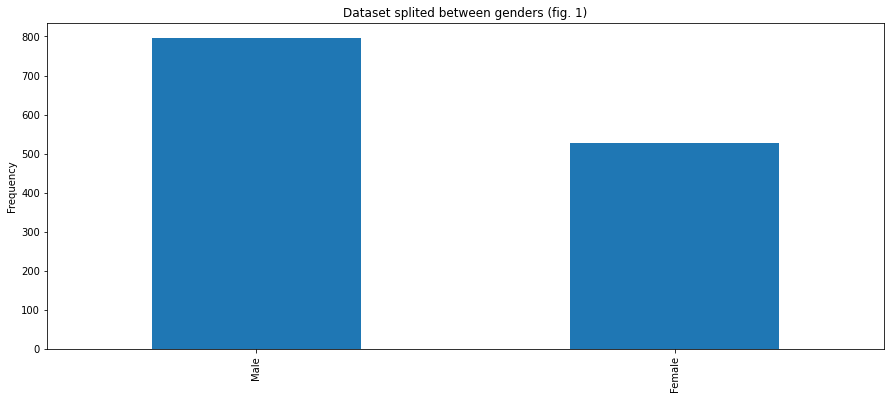

In [178]:
# view plot by gender

df_joined.Gender.value_counts().plot(kind ='bar',
                                     ylabel = 'Frequency',
                                     title = 'Dataset splited between genders (fig. 1)',
                                     figsize = (15,6))

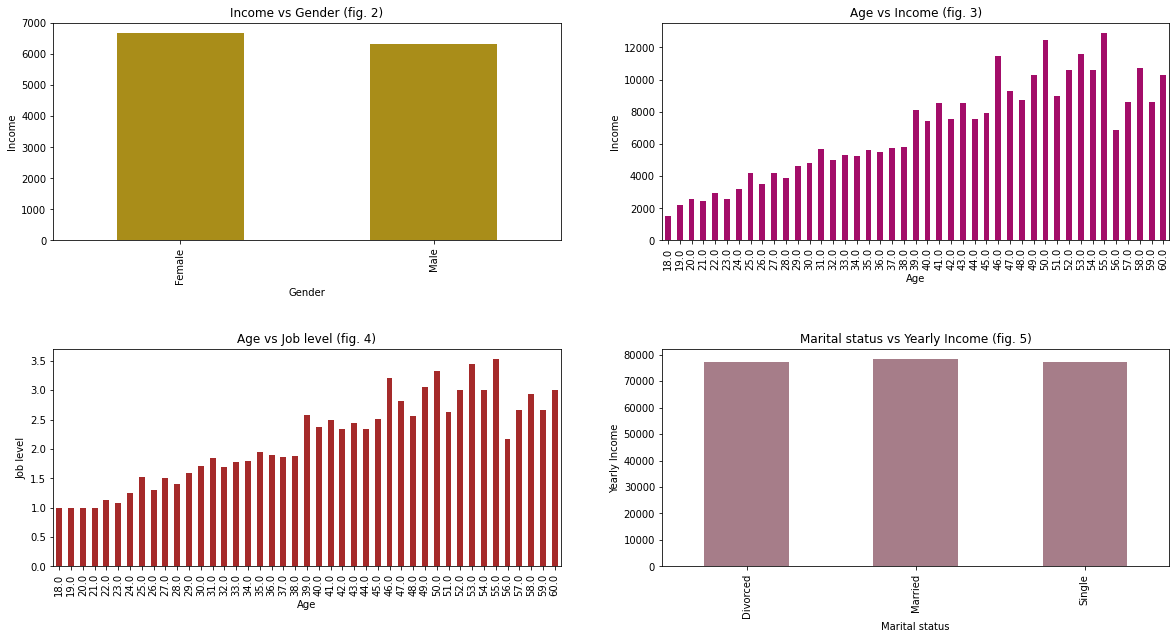

In [175]:
# plot views
# Age vs Job level

fig, axes = plt.subplots(2,2, figsize=(20, 10))

df_joined.groupby(by="Age")['JobLevel'].mean().plot(ax= axes[1][0],
                                              kind = 'bar',
                                              xlabel = 'Age',
                                              ylabel = 'Job level',
                                              title = 'Age vs Job level (fig. 4)',
                                              color = 'brown',
                                             )

# age vs Income  

df_joined.groupby('Age')['MonthlyIncome'].mean().plot(ax= axes[0][1],
                                                      kind = 'bar',
                                                      xlabel = 'Age',
                                                      ylabel = 'Income',
                                                      title = 'Age vs Income (fig. 3)',
                                                      color = '#a30d69',
                                                     )

# Income vs Gender

df_joined.groupby('Gender')['MonthlyIncome'].mean().plot(ax= axes[0][0],
                                                   kind = 'bar',
                                                   xlabel = 'Gender',
                                                   ylabel = 'Income',
                                                   title = 'Income vs Gender (fig. 2)',
                                                   color = '#a98d19',
                                                  )

# Marital status vs YearlyIncome

df_joined.groupby('MaritalStatus')['YearlyIncome'].mean().plot(ax= axes[1][1],
                                                    kind = 'bar',
                                                    xlabel = 'Marital status',
                                                    ylabel = 'Yearly Income',
                                                    title = 'Marital status vs Yearly Income (fig. 5)',
                                                    color = '#a67d89',
                                                               
                                                   )

plt.subplots_adjust(hspace=0.5)
plt.show()

In [183]:
df_joined.groupby('Gender')['JobSatisfaction'].value_counts()

Gender  JobSatisfaction
Female  3.0                166
        4.0                154
        2.0                105
        1.0                102
Male    4.0                254
        3.0                233
        1.0                157
        2.0                152
Name: JobSatisfaction, dtype: int64

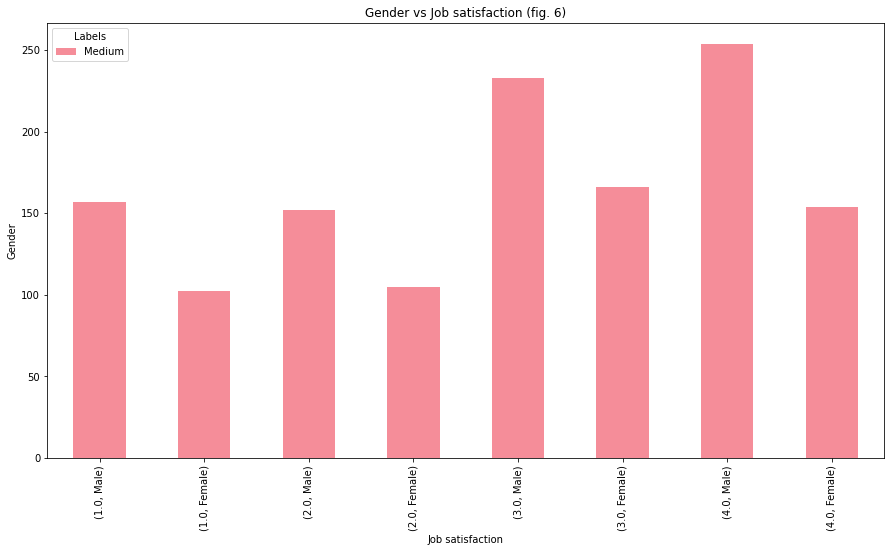

In [228]:
# plot view

fig = plt.subplots(figsize=(15, 8))


# Job atisfaction vs Gender

df_joined.groupby('JobSatisfaction')['Gender'].value_counts().plot(kind = 'bar',
                                                   xlabel = 'Job satisfaction',
                                                   ylabel = 'Gender',
                                                   title = 'Gender vs Job satisfaction (fig. 6)',
                                                   color = '#f58d99', 
                                                  )
#plt.legend([ax1, ax2, ax3, ax4],["HHZ 1", "HHN", "HHE", "sd"])

plt.legend(['Medium', 'Medium', 'High', 'Very High'], loc='upper left', title='Labels')
plt.show()

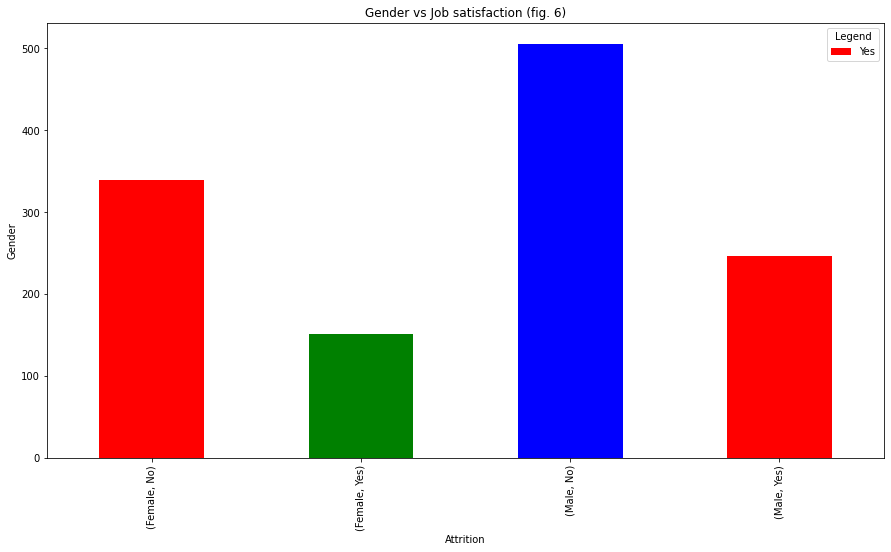

In [245]:
# plot view

fig, ax = plt.subplots(figsize=(15, 8))


# Job atisfaction vs Gender

df_joined.groupby('Gender')['Attrition'].value_counts().plot(kind = 'bar',
                                                             xlabel = 'Attrition',
                                                             ylabel = 'Gender',
                                                             title = 'Gender vs Job satisfaction (fig. 6)',
                                                             color = list('rgb'),
                                                            )
#ax.tick_params(axis='x', colors='blue')
#ax.tick_params(axis='y', colors='red')
plt.legend(['Yes', 'No'], loc='upper right', title='Legend')
plt.show()

In [231]:
df_joined.NumCompaniesWorked.value_counts()

1.0    472
0.0    182
3.0    143
2.0    129
4.0    121
7.0     70
6.0     62
5.0     53
9.0     48
8.0     43
Name: NumCompaniesWorked, dtype: int64

C:\Users\lacra\Envs\curs_python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


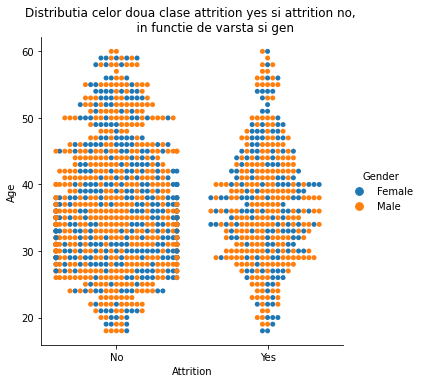

In [251]:
#plt.figure(figsize=(10,6))

#plt.title('Distributia celor doua clase attrition yes si attrition no, in functie de varsta si gen')
sns.catplot(data=df_joined,
            x='Attrition',
            y='Age',
            hue='Gender', 
            kind="swarm").set(title='''Distributia celor doua clase attrition yes si attrition no, 
            in functie de varsta si gen''')


#plt.show()

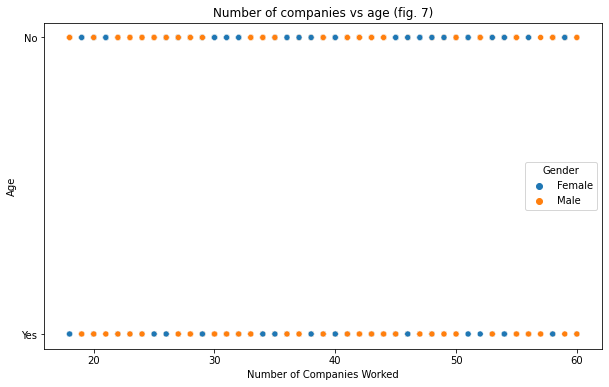

<Figure size 432x288 with 0 Axes>

In [252]:
# plot view of in how many companies a female or male worked, based on their age

"""plt.figure(figsize=(10,6))
plt.title('Number of companies vs age (fig. 7)')
sns.scatterplot(x=df_joined['Age'],y=df_joined['Attrition'], hue=df_joined['Gender'])
plt.xlabel('Number of Companies Worked')
plt.ylabel('Age')

plt.show()
plt.tight_layout()"""

In [66]:
# define a function in order to encode variables on our dataset

def encoding(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('category').cat.codes
    return df

In [67]:
# declare a list with variable we want to encode

column_list = ['BusinessTravel', 'Department' , 'EducationField', 'Gender',
               'Attrition', 'OverTime', 'MaritalStatus', 'JobRole']

In [68]:
# apply the encoding function on variable from our dataset we want to encode, saving this in a new dataset

df_joined2 = encoding(df_joined, column_list)

# view the shape of our new dataset after encoding
df_joined.shape

(1243, 37)

In [69]:
# preview of dataset after encoding - we can see that there are some variables with bad (outliers) observations

df_joined.sample(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1146.0,267,37.0,2,290.0,1,21.0,3.0,1,2.0,1,...,1.0,9.0,2.0,3.0,5.0,3.0,1.0,2.0,0,35688.0
949.0,74,35.0,1,853.0,2,18.0,5.0,1,2.0,1,...,0.0,15.0,3.0,3.0,13.0,12.0,6.0,0.0,1,123672.0
753.0,722,32.0,2,929.0,2,10.0,3.0,2,4.0,1,...,1.0,22.0,3.0,4.0,17.0,13.0,15.0,2.0,0,178224.0
65.0,1098,44.0,2,1376.0,0,1.0,2.0,3,2.0,1,...,0.0,5.0,4.0,3.0,3.0,2.0,0.0,2.0,0,41424.0
880.0,1557,48.0,2,492.0,2,16.0,4.0,1,3.0,0,...,1.0,5.0,3.0,2.0,5.0,2.0,6920.0,4.0,1,24840.0


In [70]:
# check frequency on BusinessTravel variable

df_joined.BusinessTravel.value_counts()

2    883
1    234
0    126
Name: BusinessTravel, dtype: int64

In [103]:
# check frequency on Department variable

df_joined.Department.value_counts()

1    811
2    380
0     52
Name: Department, dtype: int64

In [72]:
# view columns in our dataset

df_joined.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Distancebins',
       'EmployeeNumber_', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearlyIncome'],
      dtype='object')

In [73]:
# check the descriptive statistics on our dataset

df_joined.describe()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.00000,1243.000000,1243.000000,1243.000000,...,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.00000
mean,1000.430410,36.782784,1.609010,804.094127,1.263878,9.136766,2.90185,2.237329,2.725664,0.605792,...,0.798069,140.251006,2.806919,2.765889,104.260660,206.584875,239.831858,99.518101,0.320193,77512.89461
std,612.091004,9.156598,0.664234,402.611269,0.527388,8.062695,1.02388,1.339655,1.087719,0.488877,...,0.858000,850.861850,1.274569,0.701318,802.760037,1108.205803,1281.388366,744.145525,0.466738,55339.81871
min,1.000000,18.000000,0.000000,102.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.00000
25%,466.500000,30.000000,1.000000,466.500000,1.000000,2.000000,2.00000,1.000000,2.000000,0.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,35670.00000
50%,960.000000,36.000000,2.000000,806.000000,1.000000,7.000000,3.00000,2.000000,3.000000,1.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,59616.00000
75%,1587.000000,43.000000,2.000000,1157.500000,2.000000,14.000000,4.00000,3.000000,4.000000,1.000000,...,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,1.000000,98742.00000
max,2068.000000,60.000000,2.000000,1496.000000,2.000000,29.000000,5.00000,5.000000,4.000000,1.000000,...,3.000000,9815.000000,6.000000,4.000000,9445.000000,9459.000000,9952.000000,9404.000000,1.000000,239676.00000


In [74]:
# define a function in order to eliminate outliers from a list of variables

def eliminate_outliers(df, columns):
    desc_mat = df.describe()
    for column in columns:
        _25_per_0 = (desc_mat[column][4] + 1) / (desc_mat[column][3] + 1)
        _50_per_25 = (desc_mat[column][5] + 1) / (desc_mat[column][4] + 1)
        _75_per_50 = (desc_mat[column][6] + 1) / (desc_mat[column][5] + 1)
        hundred = (_25_per_0/ _50_per_25) * (_50_per_25 / _75_per_50)
        hundred *= (2 * desc_mat[column][6])
        df = df[df[column] <= hundred]
    return df


In [75]:

#hundred = hundred * desc_mat[][] + hundred

In [76]:
# declare the list with variables from witch we want to eliminate outliers

columns = ["TotalWorkingYears", "YearsWithCurrManager", "YearsSinceLastPromotion", "YearsInCurrentRole", "YearsAtCompany"]

# apply the function, saving result in a new dataset

df_joined_without_outliers = eliminate_outliers(df_joined, columns)

# view descriptive statistics in our cleaned dataset
df_joined_without_outliers.describe()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,864.479903,36.923264,1.619976,800.200974,1.246041,9.058465,2.900122,2.257004,2.753959,0.588307,...,0.799026,9.915956,2.780755,2.785627,5.388551,3.213155,0.690621,3.218027,0.255786,68474.280146
std,556.469482,9.131703,0.654657,402.246105,0.523007,7.977040,1.015616,1.349242,1.071982,0.492440,...,0.860969,7.078583,1.285252,0.696919,5.043113,3.039516,0.847822,3.147971,0.436568,49735.317401
min,1.000000,18.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,404.000000,30.000000,1.000000,448.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,33276.000000
50%,828.000000,36.000000,2.000000,817.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,1.000000,8.000000,3.000000,3.000000,5.000000,2.000000,0.000000,2.000000,0.000000,53580.000000
75%,1217.000000,43.000000,2.000000,1136.000000,2.000000,13.000000,4.000000,3.000000,4.000000,1.000000,...,1.000000,12.000000,3.000000,3.000000,7.000000,4.000000,1.000000,4.000000,1.000000,79836.000000
max,2068.000000,60.000000,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,3.000000,38.000000,6.000000,4.000000,37.000000,16.000000,3.000000,17.000000,1.000000,236880.000000


In [77]:
# preview of our cleaned dataset - we can see that, after cleaning, our dataset has only 821 observation in each variable
df_joined_without_outliers

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1228.0,1,41.0,2,1102.0,2,1.0,2.0,1,2.0,0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
504.0,8,32.0,1,1005.0,1,2.0,2.0,1,4.0,1,...,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,1,28212.0
288.0,11,30.0,2,1358.0,1,24.0,1.0,1,4.0,1,...,1.0,5.0,6.0,4.0,5.0,3.0,0.0,3.0,0,24528.0
408.0,12,38.0,1,216.0,1,23.0,3.0,1,4.0,1,...,1.0,19.0,6.0,4.0,1.0,0.0,0.0,0.0,1,25032.0
1297.0,14,35.0,2,809.0,1,16.0,3.0,3,1.0,1,...,2.0,10.0,4.0,2.0,9.0,5.0,1.0,6.0,0,65640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349.0,2041,38.0,2,345.0,2,10.0,2.0,1,1.0,0,...,1.0,9.0,2.0,3.0,5.0,3.0,1.0,2.0,0,35688.0
498.0,2048,40.0,2,1322.0,1,2.0,4.0,1,3.0,1,...,1.0,18.0,3.0,3.0,1.0,0.0,0.0,0.0,1,78192.0
906.0,2049,35.0,1,1199.0,1,18.0,4.0,1,3.0,1,...,1.0,18.0,3.0,3.0,1.0,0.0,0.0,0.0,0,78192.0
790.0,2065,49.0,1,1023.0,2,2.0,3.0,3,4.0,1,...,0.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1,27456.0


In [78]:
# check if our function will work

desc_mat = df_joined.describe()
_25_per_0 = (desc_mat.YearsInCurrentRole[4] + 1) / (desc_mat.YearsInCurrentRole[3] + 1)
_50_per_25 = (desc_mat.YearsInCurrentRole[5] + 1) / (desc_mat.YearsInCurrentRole[4] + 1)
_75_per_50 = (desc_mat.YearsInCurrentRole[6] + 1) / (desc_mat.YearsInCurrentRole[5] + 1)
hundred = (_25_per_0/ _50_per_25) * (_50_per_25 / _75_per_50)
hundred *= desc_mat.YearsInCurrentRole[6]
hundred

10.5

In [79]:
#df_joined["YearsInCurrentRole"] = df_joined[df_joined["YearsInCurrentRole"] <= hundred]
#df_joined = df_joined[df_joined['YearsInCurrentRole'] <= hundred]
#df_joined.describe()

# preview of our dataset
df_joined_without_outliers.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1228.0,1,41.0,2,1102.0,2,1.0,2.0,1,2.0,0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
504.0,8,32.0,1,1005.0,1,2.0,2.0,1,4.0,1,...,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,1,28212.0
288.0,11,30.0,2,1358.0,1,24.0,1.0,1,4.0,1,...,1.0,5.0,6.0,4.0,5.0,3.0,0.0,3.0,0,24528.0
408.0,12,38.0,1,216.0,1,23.0,3.0,1,4.0,1,...,1.0,19.0,6.0,4.0,1.0,0.0,0.0,0.0,1,25032.0
1297.0,14,35.0,2,809.0,1,16.0,3.0,3,1.0,1,...,2.0,10.0,4.0,2.0,9.0,5.0,1.0,6.0,0,65640.0


In [80]:
# check again descriptive statistics on cleaned dataset, to see if we missed any error

df_joined_without_outliers.describe()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,864.479903,36.923264,1.619976,800.200974,1.246041,9.058465,2.900122,2.257004,2.753959,0.588307,...,0.799026,9.915956,2.780755,2.785627,5.388551,3.213155,0.690621,3.218027,0.255786,68474.280146
std,556.469482,9.131703,0.654657,402.246105,0.523007,7.977040,1.015616,1.349242,1.071982,0.492440,...,0.860969,7.078583,1.285252,0.696919,5.043113,3.039516,0.847822,3.147971,0.436568,49735.317401
min,1.000000,18.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,404.000000,30.000000,1.000000,448.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,33276.000000
50%,828.000000,36.000000,2.000000,817.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,1.000000,8.000000,3.000000,3.000000,5.000000,2.000000,0.000000,2.000000,0.000000,53580.000000
75%,1217.000000,43.000000,2.000000,1136.000000,2.000000,13.000000,4.000000,3.000000,4.000000,1.000000,...,1.000000,12.000000,3.000000,3.000000,7.000000,4.000000,1.000000,4.000000,1.000000,79836.000000
max,2068.000000,60.000000,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,3.000000,38.000000,6.000000,4.000000,37.000000,16.000000,3.000000,17.000000,1.000000,236880.000000


In [81]:
#it looks good now.
''' because of a difference on distribution between variables, we will apply a standard scaler in order to scale 
some of these variables - we use Standard Scaler from sklearn library'''  

# declare a list with variables we want to scale
numeric_cols = ["Age", "DailyRate", "DistanceFromHome", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", 
                "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "YearlyIncome"]

# define variable for scaling
ss = StandardScaler()

# apply scaling on our variables
scaled_array = ss.fit_transform(df_joined_without_outliers[numeric_cols])

# define new dataframe with scaled variables
df_scaled = pd.DataFrame(scaled_array, columns = numeric_cols)

In [82]:
# view 

df_scaled.describe()

,Age,DailyRate,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02,8.210000e+02
mean,-1.779602e-16,-9.520061e-17,8.654601e-18,3.461840e-17,5.300943e-17,2.488198e-17,-8.654601e-18,6.274586e-17,-7.356411e-17,-6.707316e-17
std,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00,1.000610e+00
min,-2.073523e+00,-1.734326e+00,-1.010823e+00,-1.401693e+00,-2.164906e+00,-1.069148e+00,-1.057772e+00,-8.150793e-01,-1.022877e+00,-1.134016e+00
25%,-7.586191e-01,-8.761195e-01,-8.853871e-01,-6.949064e-01,-6.078427e-01,-6.723260e-01,-7.285712e-01,-8.150793e-01,-7.050188e-01,-7.081434e-01
50%,-1.011670e-01,4.178851e-02,-2.582061e-01,-2.708344e-01,1.706891e-01,-7.709274e-02,-3.993709e-01,-8.150793e-01,-3.871602e-01,-2.996534e-01
75%,6.658604e-01,8.353188e-01,4.944111e-01,2.945949e-01,1.706891e-01,3.197294e-01,2.590297e-01,3.651325e-01,2.485569e-01,2.285830e-01
max,2.528641e+00,1.730839e+00,2.501390e+00,3.969885e+00,2.506284e+00,6.272062e+00,4.209434e+00,2.725556e+00,4.380718e+00,3.388103e+00


In [122]:

numeric_cols = ["EmployeeNumber", "Age", "DailyRate", "DistanceFromHome", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", 
                "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "YearlyIncome"]

df_for_scaling = df_joined_without_outliers[numeric_cols].set_index("EmployeeNumber")

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_array = ss.fit_transform(df_joined_without_outliers[numeric_cols])
df_scaled = pd.DataFrame(scaled_array, columns = numeric_cols, index = df_for_scaling.index)

numeric_cols2 = ["Age", "DailyRate", "DistanceFromHome", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", 
                "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "YearlyIncome"]

df_joined_without_outliers2 = df_joined_without_outliers.drop(columns = numeric_cols2)

df3 = df_joined_without_outliers2.join(df_scaled, on="EmployeeNumber", rsuffix='_')

df3 = df3.dropna()

df3 = df3.drop(columns = "EmployeeNumber_")

In [123]:
df3.shape

(821, 34)

In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 821 entries, 1228.0 to 487.0
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            821 non-null    int64  
 1   BusinessTravel            821 non-null    int8   
 2   Department                821 non-null    int8   
 3   Education                 821 non-null    float64
 4   EducationField            821 non-null    int8   
 5   EnvironmentSatisfaction   821 non-null    float64
 6   Gender                    821 non-null    int8   
 7   HourlyRate                821 non-null    float64
 8   JobInvolvement            821 non-null    float64
 9   JobLevel                  821 non-null    float64
 10  JobRole                   821 non-null    int8   
 11  JobSatisfaction           821 non-null    float64
 12  MaritalStatus             821 non-null    int8   
 13  MonthlyIncome             821 non-null    float64
 14  M

In [130]:
df3.EmployeeNumber.value_counts()

1       1
1082    1
1066    1
1069    1
1070    1
       ..
546     1
547     1
548     1
549     1
2068    1
Name: EmployeeNumber, Length: 821, dtype: int64

In [128]:
df3.corr()

,EmployeeNumber,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Age,DailyRate,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,-0.009652,-0.056957,0.065877,0.011551,-0.019959,0.036596,0.004300,-0.000690,0.001410,...,-0.021237,-0.046372,0.026831,-0.001610,0.000221,0.017325,0.026950,0.002874,0.031336,0.035303
BusinessTravel,-0.009652,1.000000,0.027657,0.007040,0.037533,0.005622,0.005870,-0.002667,0.011810,0.026222,...,0.014700,-0.013228,-0.061127,0.018363,0.051592,0.072113,0.053629,0.016421,0.025460,0.016192
Department,-0.056957,0.027657,1.000000,-0.006485,0.043352,0.012399,-0.041848,0.009011,-0.009464,0.134078,...,-0.003702,-0.017324,0.024025,0.071803,0.049506,0.044161,0.012997,0.017862,0.013302,0.063561
Education,0.065877,0.007040,-0.006485,1.000000,-0.049771,0.016606,-0.009165,0.007769,0.075228,0.101118,...,0.217847,-0.018671,0.043923,-0.035435,-0.025205,-0.020033,0.012041,-0.016102,-0.008057,-0.037517
EducationField,0.011551,0.037533,0.043352,-0.049771,1.000000,0.080028,-0.002079,0.007969,0.013547,-0.027336,...,-0.027794,0.013355,-0.023266,0.006606,-0.029353,0.025990,0.014876,-0.021024,0.023830,0.029972
EnvironmentSatisfaction,-0.019959,0.005622,0.012399,0.016606,0.080028,1.000000,-0.002684,-0.065921,-0.032787,0.001047,...,0.037312,0.058961,-0.039531,-0.014943,-0.003795,0.026052,0.031086,0.015438,0.021337,-0.018369
Gender,0.036596,0.005870,-0.041848,-0.009165,-0.002079,-0.002684,1.000000,0.013114,0.023794,-0.063512,...,-0.036594,-0.029010,-0.001937,0.032044,-0.015617,0.037974,0.009000,-0.010428,0.035159,0.034412
HourlyRate,0.004300,-0.002667,0.009011,0.007769,0.007969,-0.065921,0.013114,1.000000,0.003747,-0.030060,...,0.006172,0.014386,-0.003048,0.007422,-0.003373,0.032254,0.038554,0.012096,0.009491,0.045672
JobInvolvement,-0.000690,0.011810,-0.009464,0.075228,0.013547,-0.032787,0.023794,0.003747,1.000000,-0.005142,...,0.058367,0.046580,0.057563,0.040435,0.015626,0.044722,0.069509,0.037859,0.042765,0.013443
JobLevel,0.001410,0.026222,0.134078,0.101118,-0.027336,0.001047,-0.063512,-0.030060,-0.005142,1.000000,...,0.476214,0.036821,0.004764,0.048899,-0.036248,0.038873,0.011486,-0.030208,-0.001890,0.088895


In [111]:
#df_scaled_2 = df_scaled.join(df_joined_without_outliers.drop(columns = numeric_cols), 'Age', rsuffix = '_', how = 'right')
#df_scaled_2.info()

In [125]:
#df_joined_without_outliers.info()

In [126]:
#df_joined_without_outliers = df_joined_without_outliers.drop(columns = ['Distancebins', 'EmployeeNumber_', 'Over18'])

In [127]:
#df_joined_without_outliers.head()

In [132]:
df3 = df3.drop(columns = 'StandardHours')
df3.shape

(821, 33)

In [140]:

x = df3.drop(columns = ["EmployeeNumber", "Attrition"])
y = df3.Attrition

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .3)

In [141]:


model_rfc = RandomForestClassifier(n_estimators = 200, max_depth = 5, random_state = 5)
model_rfc.fit(x_train,y_train)
y_pred_rfc = model_rfc.predict(x_test)

print(accuracy_score(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))



0.7651821862348178
[[188   0]
 [ 58   1]]


In [142]:

model_ada = AdaBoostClassifier(random_state = 5)
model_ada.fit(x_train,y_train)
y_pred_ada = model_ada.predict(x_test)

print(accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))



0.7125506072874493
[[166  22]
 [ 49  10]]


In [143]:


dec_tree = tree.DecisionTreeClassifier(max_depth = 5, random_state = 5)
dec_tree.fit(x_train, y_train)
y_pred_d_tree = dec_tree.predict(x_test)

print(accuracy_score(y_test, y_pred_d_tree))
print(confusion_matrix(y_test,y_pred_d_tree))



0.7449392712550608
[[175  13]
 [ 50   9]]


In [144]:

print(classification_report(y_test, y_pred_d_tree))
print(precision_score(y_test,y_pred_d_tree))
print(recall_score(y_test,y_pred_d_tree))
print(f1_score(y_test,y_pred_d_tree))



              precision    recall  f1-score   support

           0       0.78      0.93      0.85       188
           1       0.41      0.15      0.22        59

    accuracy                           0.74       247
   macro avg       0.59      0.54      0.53       247
weighted avg       0.69      0.74      0.70       247

0.4090909090909091
0.15254237288135594
0.22222222222222224


In [145]:
print(classification_report(y_test, y_pred_rfc))
print(precision_score(y_test, y_pred_rfc))
print(recall_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.76      1.00      0.87       188
           1       1.00      0.02      0.03        59

    accuracy                           0.77       247
   macro avg       0.88      0.51      0.45       247
weighted avg       0.82      0.77      0.67       247

1.0
0.01694915254237288
0.03333333333333333


In [146]:

print(classification_report(y_test, y_pred_ada))
print(precision_score(y_test, y_pred_ada))
print(recall_score(y_test, y_pred_ada))
print(f1_score(y_test, y_pred_ada))


     

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       188
           1       0.31      0.17      0.22        59

    accuracy                           0.71       247
   macro avg       0.54      0.53      0.52       247
weighted avg       0.66      0.71      0.68       247

0.3125
0.1694915254237288
0.21978021978021978


In [147]:

class_rep_parsed = classification_report(y_test, y_pred_ada).split('\n')



In [148]:

scores = class_rep_parsed[2].replace(' ', '')
scores



'00.770.880.82188'

In [149]:

def parse_classification_report_to_f1(string):
    string = string.split('\n')[2:4]
    scores = []
    for i in range(2):
        scores.append(string[i].replace(' ', ''))
    return scores


In [150]:

score_ada = parse_classification_report_to_f1(classification_report(y_test, y_pred_ada))
score_ada



['00.770.880.82188', '10.310.170.2259']

In [151]:

# score_ada_final = [score_ada[0][0], score_ada[0][1:4], score_ada[0][4:8], ]



In [152]:


def get_f1(y_test, y_pred):
    scores = precision_recall_fscore_support(y_test, y_pred, pos_label = 1)
    return scores[2]



In [153]:

scores_ada = get_f1(y_test, y_pred_ada)

scores_rfc = get_f1(y_test, y_pred_rfc)

scores_d_tree = get_f1(y_test, y_pred_d_tree)
scores_d_tree, scores_rfc, scores_ada


(array([0.84745763, 0.22222222]),
 array([0.86635945, 0.03333333]),
 array([0.82382134, 0.21978022]))

In [311]:

final_scores = [scores_ada, scores_rfc, scores_d_tree, scores_ada_v1, scores_rfc_v1, scores_dtree_v1]
final_scores


[array([0.82382134, 0.21978022]),
 array([0.86635945, 0.03333333]),
 array([0.84745763, 0.22222222]),
 array([0.63629684, 0.59459459]),
 array([0.63414634, 0.59723352]),
 array([0.66412698, 0.47467726])]

In [312]:

df_scores = pd.DataFrame(final_scores, columns = ["f1_score - stay", "f1_score - leave"], 
                         index = ['AdaBoost', 'RandomForrest', 'Decision_tree', 'AdaBoost_var1',
                                  'RandomForrest_var1', 'Decision_tree_var1'])
df_scores


,f1_score - stay,f1_score - leave
AdaBoost,0.823821,0.219780
RandomForrest,0.866359,0.033333
Decision_tree,0.847458,0.222222
AdaBoost_var1,0.636297,0.594595
RandomForrest_var1,0.634146,0.597234
Decision_tree_var1,0.664127,0.474677
